In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("C:/Users/SAI CHARAN/Desktop/car_price_prediction.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import metrics


In [7]:
data=pd.read_csv("C:/Users/SAI CHARAN/Desktop/car_price_prediction.csv")
len(data)

19237

In [8]:
data.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [9]:
data.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [10]:
pd.options.display.float_format='{:,.2f}'.format
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,"19,237.00","19,237.00","19,237.00","19,237.00","19,237.00"
mean,"45,576,535.89","18,555.93","2,010.91",4.58,6.58
std,"936,591.42","190,581.27",5.67,1.20,4.32
min,"20,746,880.00",1.00,"1,939.00",1.00,0.00
25%,"45,698,374.00","5,331.00","2,009.00",4.00,4.00
50%,"45,772,308.00","13,172.00","2,012.00",4.00,6.00
75%,"45,802,036.00","22,075.00","2,015.00",4.00,12.00
max,"45,816,654.00","26,307,500.00","2,020.00",16.00,16.00


In [11]:
for col in data.columns:
    print(col,":",data[col].nunique())
    print(data[col].value_counts().nlargest(5))
    print("*****************")

ID : 18924
45815365    8
45815361    8
45815363    7
45815368    7
45723475    7
Name: ID, dtype: int64
*****************
Price : 2315
15681    280
470      274
14113    244
392      242
314      235
Name: Price, dtype: int64
*****************
Levy : 559
-      5819
765     486
891     461
639     410
640     405
Name: Levy, dtype: int64
*****************
Manufacturer : 65
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: Manufacturer, dtype: int64
*****************
Model : 1590
Prius      1083
Sonata     1079
Camry       938
Elantra     922
E 350       542
Name: Model, dtype: int64
*****************
Prod. year : 54
2012    2155
2014    2124
2013    1963
2011    1612
2015    1549
Name: Prod. year, dtype: int64
*****************
Category : 11
Sedan        8736
Jeep         5473
Hatchback    2847
Minivan       647
Coupe         532
Name: Category, dtype: int64
*****************
Leather interior : 2
Yes    13954
No      528

In [12]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [13]:
# we can see that the ID field is useless 
data.drop(columns='ID', inplace=True)
data.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2


In [14]:
data.columns=data.columns.str.lower().str.replace(" ","_")
data.head()

,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.00,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.00,Automatic,Front,04-May,Left wheel,Silver,4


In [15]:
data[data['levy'] == "-"]


,price,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2
9,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
11,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.00,Manual,Rear,02-Mar,Left wheel,Blue,0
12,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.00,Manual,Front,04-May,Left wheel,White,4
23,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.00,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.00,Automatic,Front,04-May,Left wheel,Blue,4
19224,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.00,Automatic,Front,04-May,Left wheel,Black,12
19226,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.00,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.00,Automatic,Front,04-May,Left wheel,Silver,6


In [16]:
# we will replace the '-' with null
data['levy'].replace({'-':np.nan}, inplace = True)
# we have to convert the type of the Levy column  to float
data['levy'] = data['levy'].astype('float64')


In [17]:
data.isnull().sum()

price                  0
levy                5819
manufacturer           0
model                  0
prod._year             0
category               0
leather_interior       0
fuel_type              0
engine_volume          0
mileage                0
cylinders              0
gear_box_type          0
drive_wheels           0
doors                  0
wheel                  0
color                  0
airbags                0
dtype: int64

In [18]:
data.drop_duplicates(inplace=True)
data.shape

(15725, 17)

In [19]:
#we see that there are cars with price under 500$ which is unbelievable
#we will keep the cars only greater than 500$
data=data[data["price"]>500]
data.shape

(14799, 17)

In [20]:
# The engine_volume column has float values with object type we have to convert them to float
# before that we have to deal with the "Turbo" cells
data['Turbo_engine']=data['engine_volume'].str.contains('Turbo')
data['engine_volume']=data['engine_volume'].str.slice(0,3)
data['engine_volume']=data['engine_volume'].astype('float64')

In [21]:
#we will rename the Mileage column to Mileage/km and change the type from object to int
data.rename(columns={'mileage':'Mileage/km'},inplace=True)
data['Mileage/km']=data['Mileage/km'].str.strip('km')
data['Mileage/km']=data['Mileage/km'].astype('int64')

In [22]:
#change the type of Cylinders column to int
data['cylinders']=data['cylinders'].astype('int64')

In [23]:
#the doors column has the wrong values we can remove or change them
#change the type of values into int
data['doors'].replace({'04-May':'4','02-Mar':'2','>5':'5'},inplace=True)
data['doors']=data['doors'].astype('int64')


In [24]:
categorical_col=data.select_dtypes(['object','boolean'])
categorical_col.head(3)


,manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,wheel,color,Turbo_engine
0,LEXUS,RX 450,Jeep,Yes,Hybrid,Automatic,4x4,Left wheel,Silver,False
1,CHEVROLET,Equinox,Jeep,No,Petrol,Tiptronic,4x4,Left wheel,Black,False
2,HONDA,FIT,Hatchback,No,Petrol,Variator,Front,Right-hand drive,Black,False


In [25]:
numerical_col=data.select_dtypes(['int','float'])
numerical_col.head(3)


,price,levy,prod._year,engine_volume,Mileage/km,cylinders,doors,airbags
0,13328,"1,399.00",2010,3.50,186005,6,4,12
1,16621,"1,018.00",2011,3.00,192000,6,4,8
2,8467,NaN,2006,1.30,200000,4,4,2


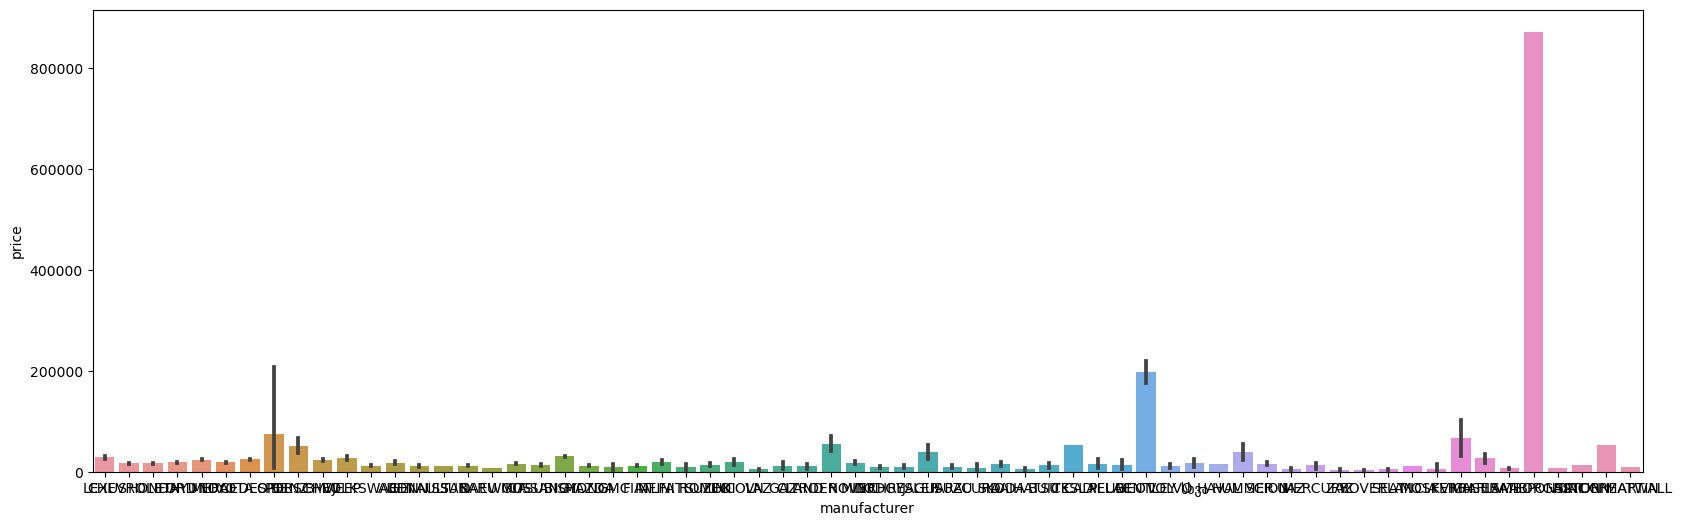

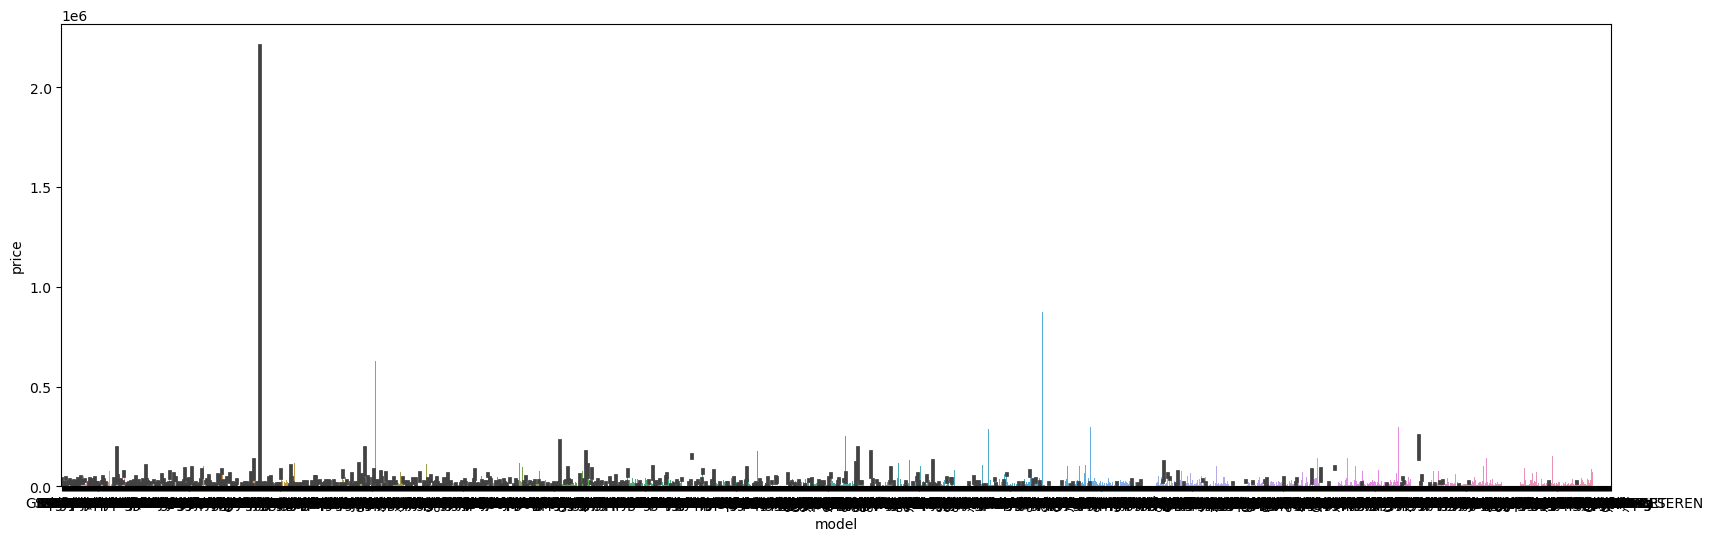

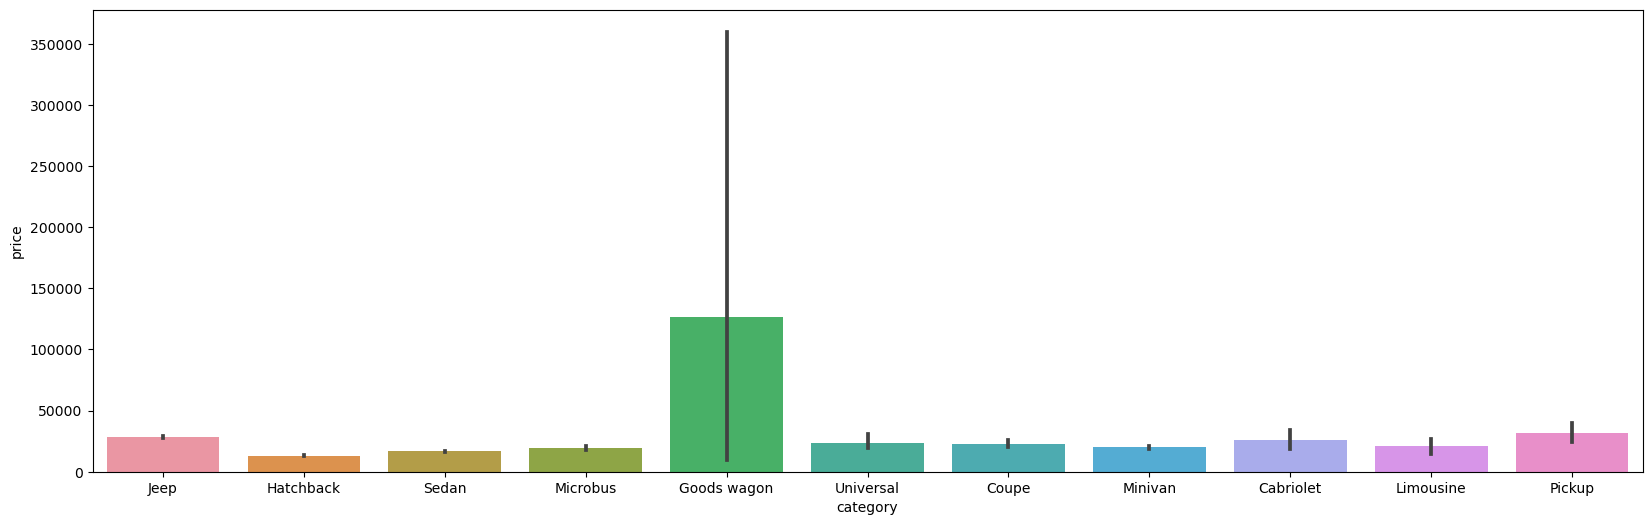

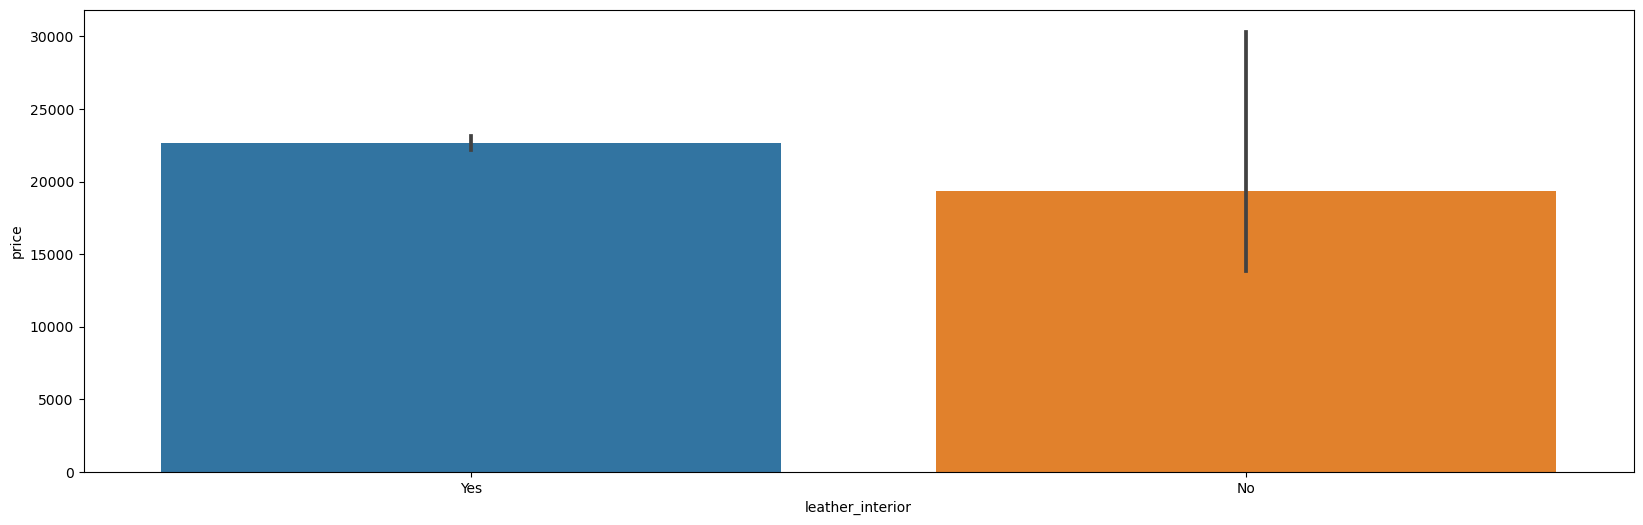

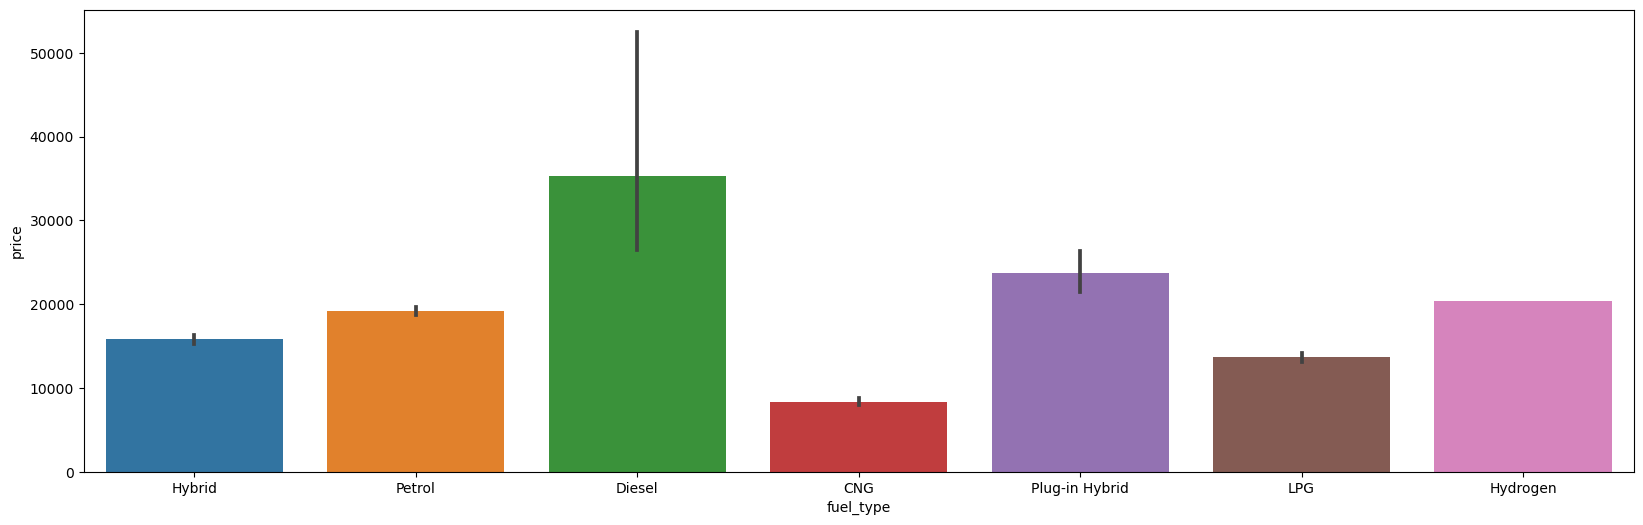

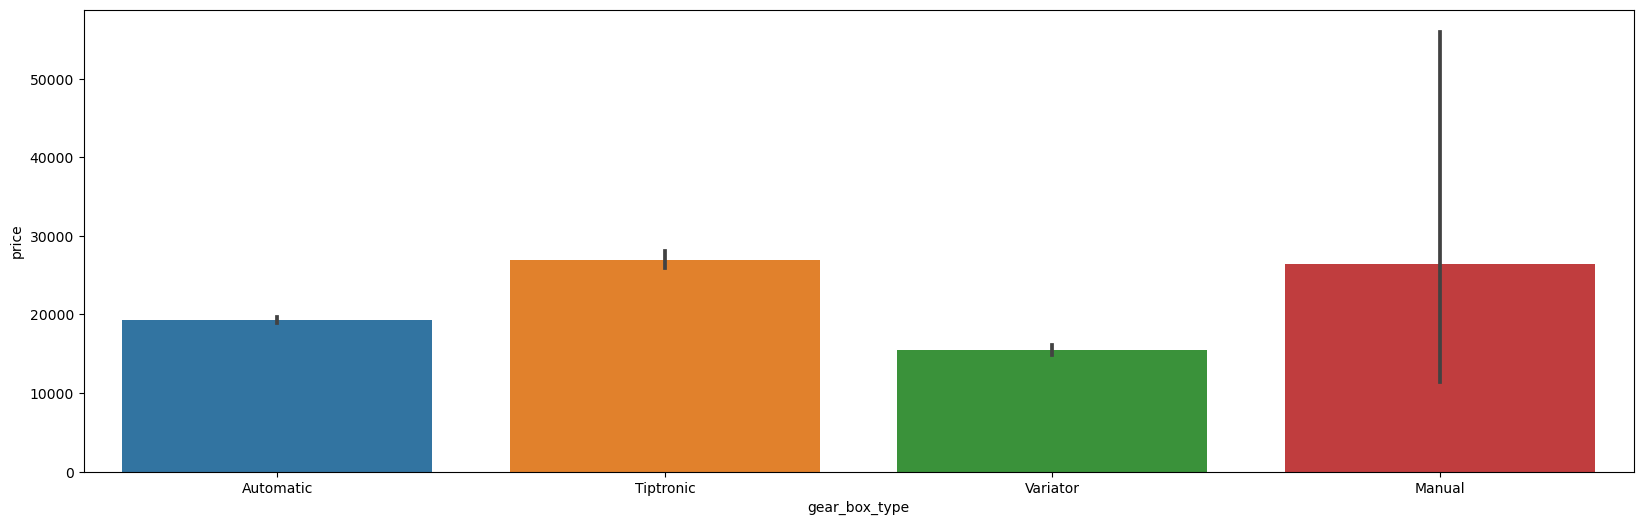

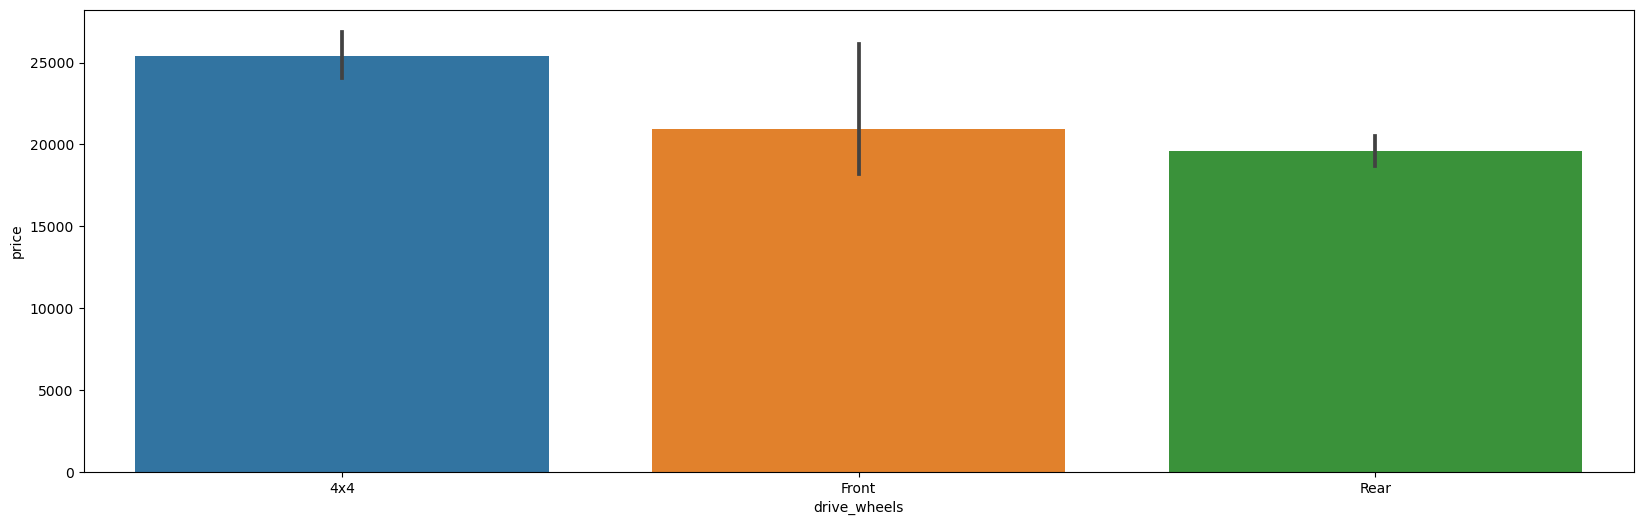

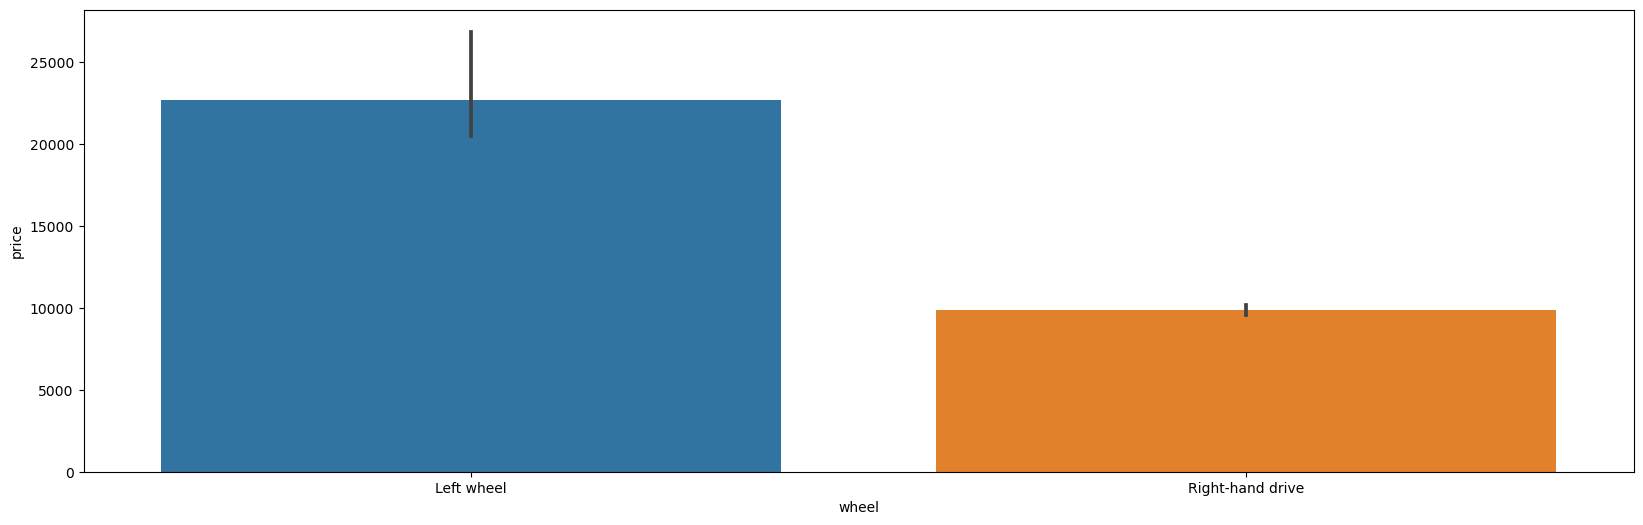

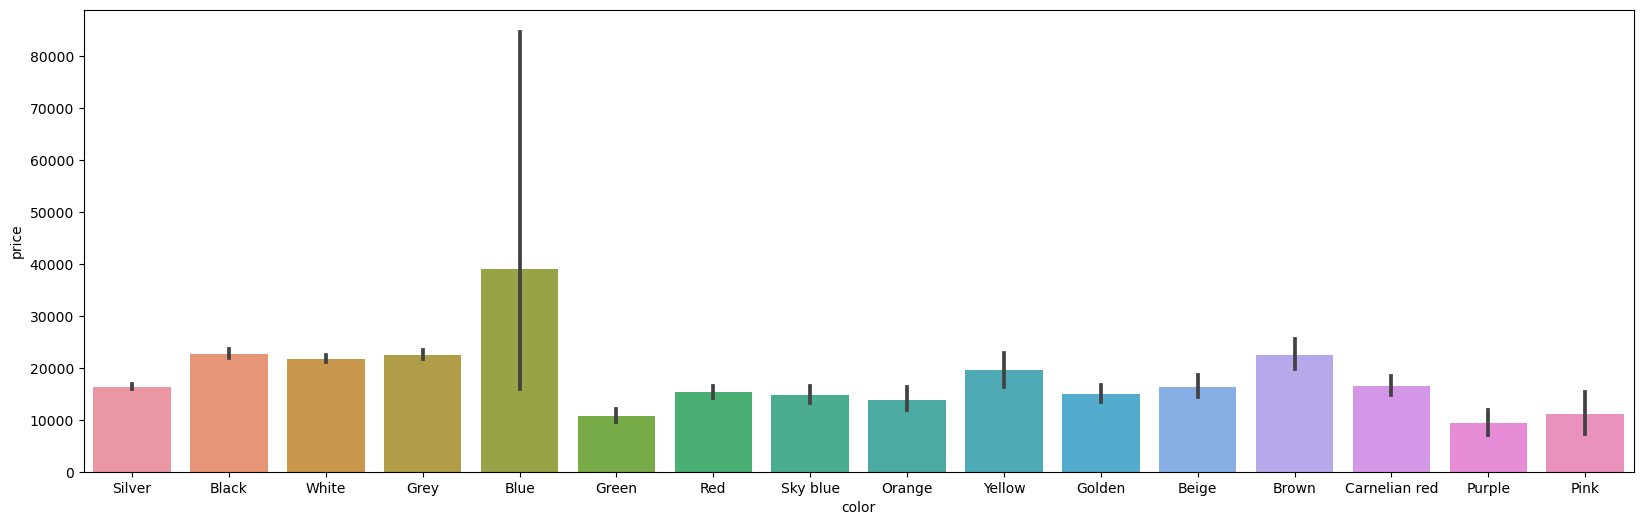

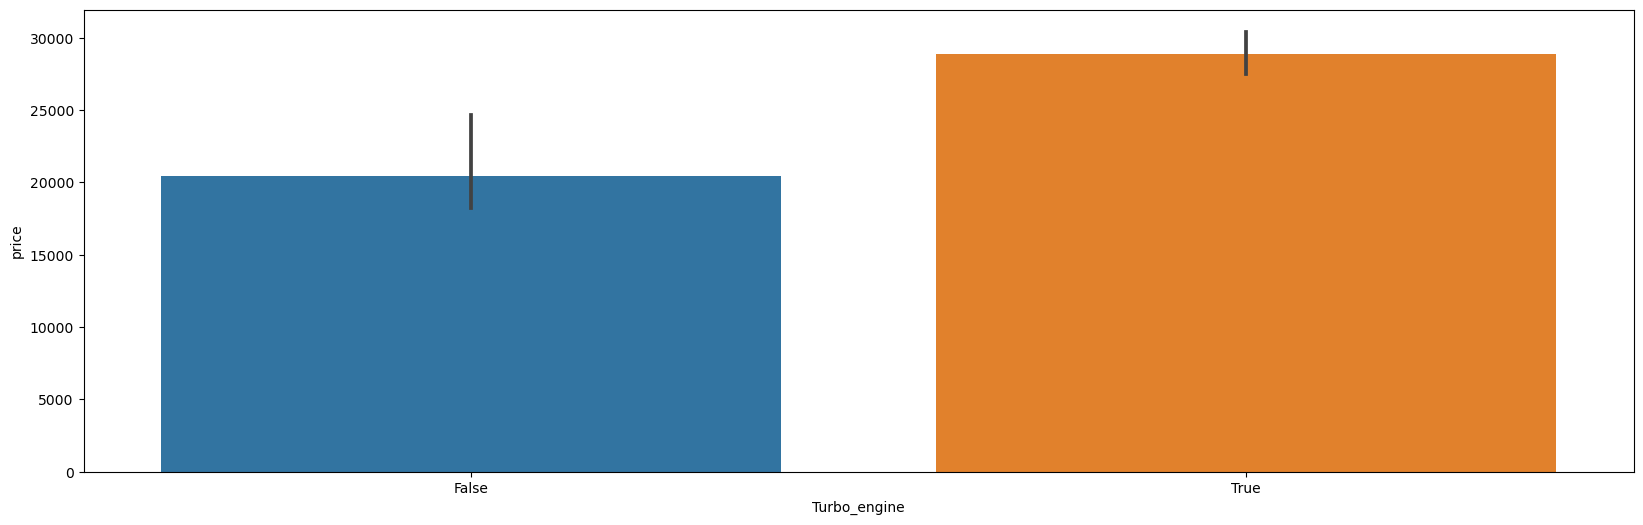

In [26]:
# Plot the categorical variables 
for col in categorical_col:
    plt.figure(figsize=(20,6))
    sns.barplot(x=data[col],y=data['price'])


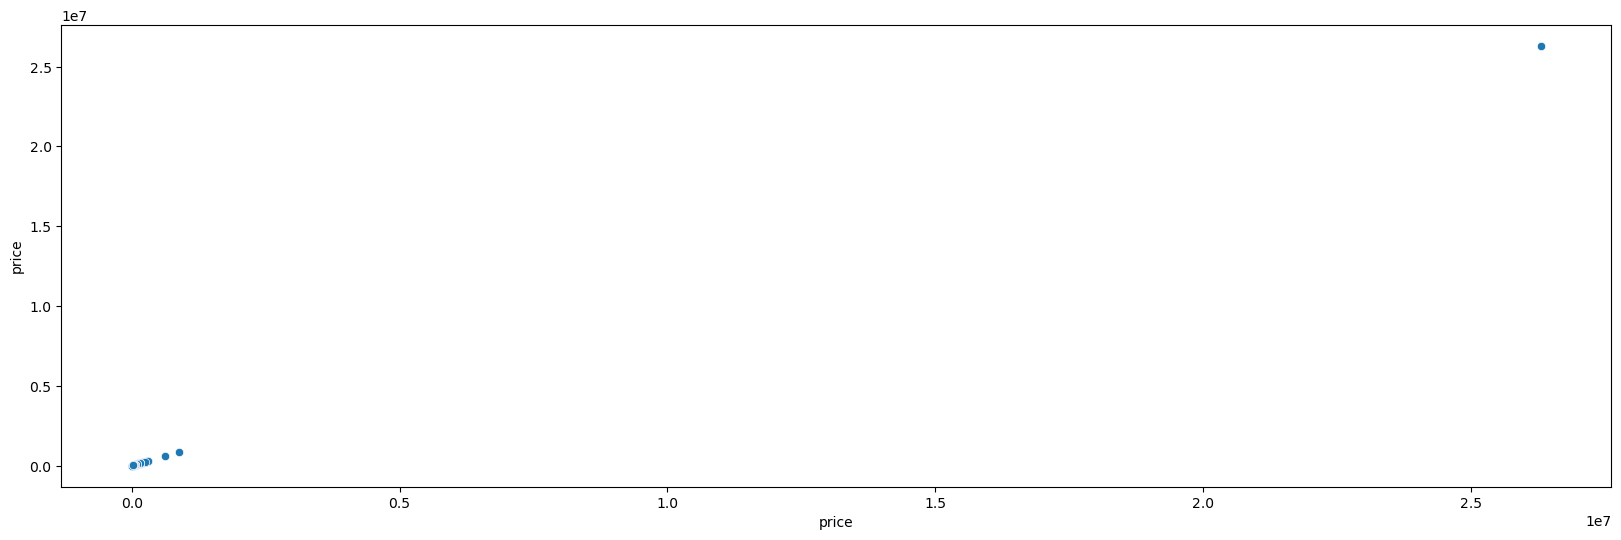

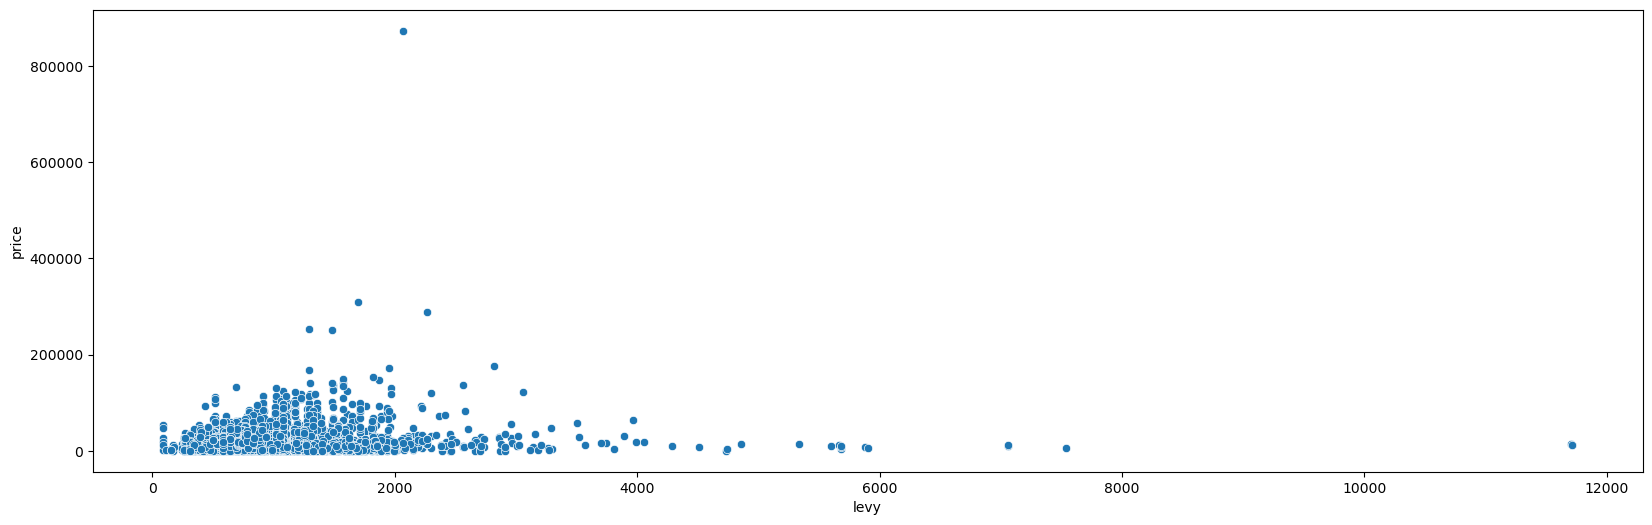

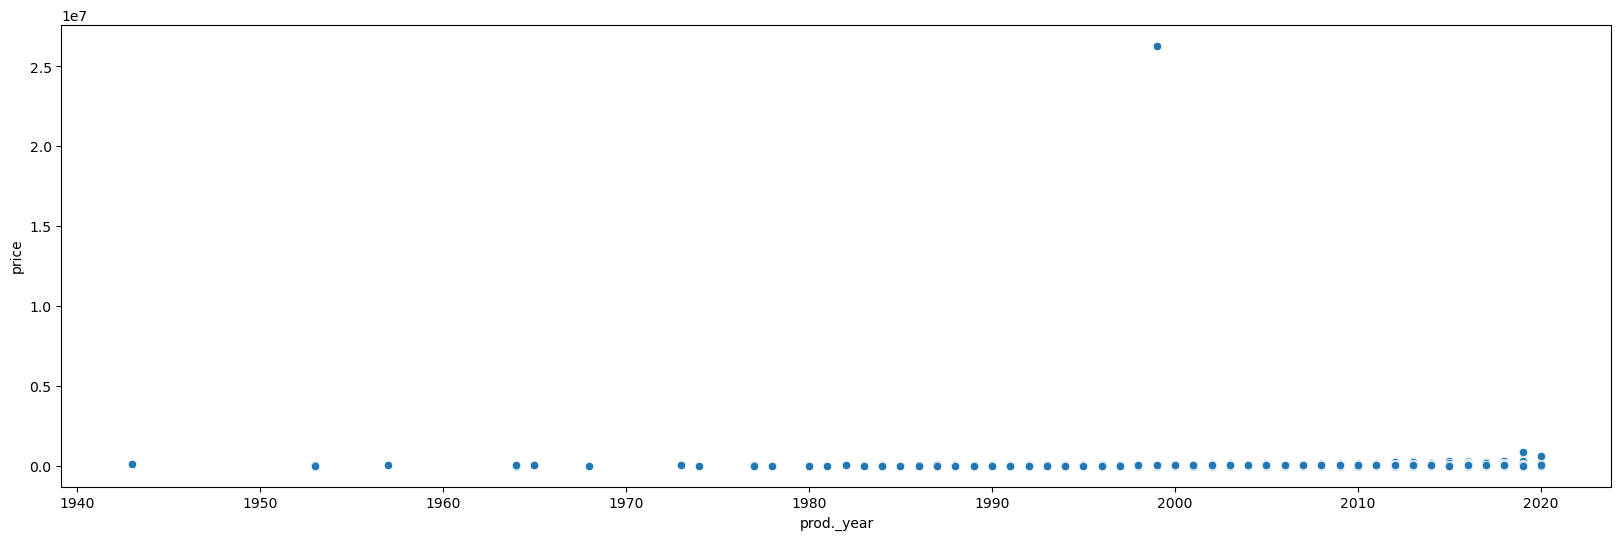

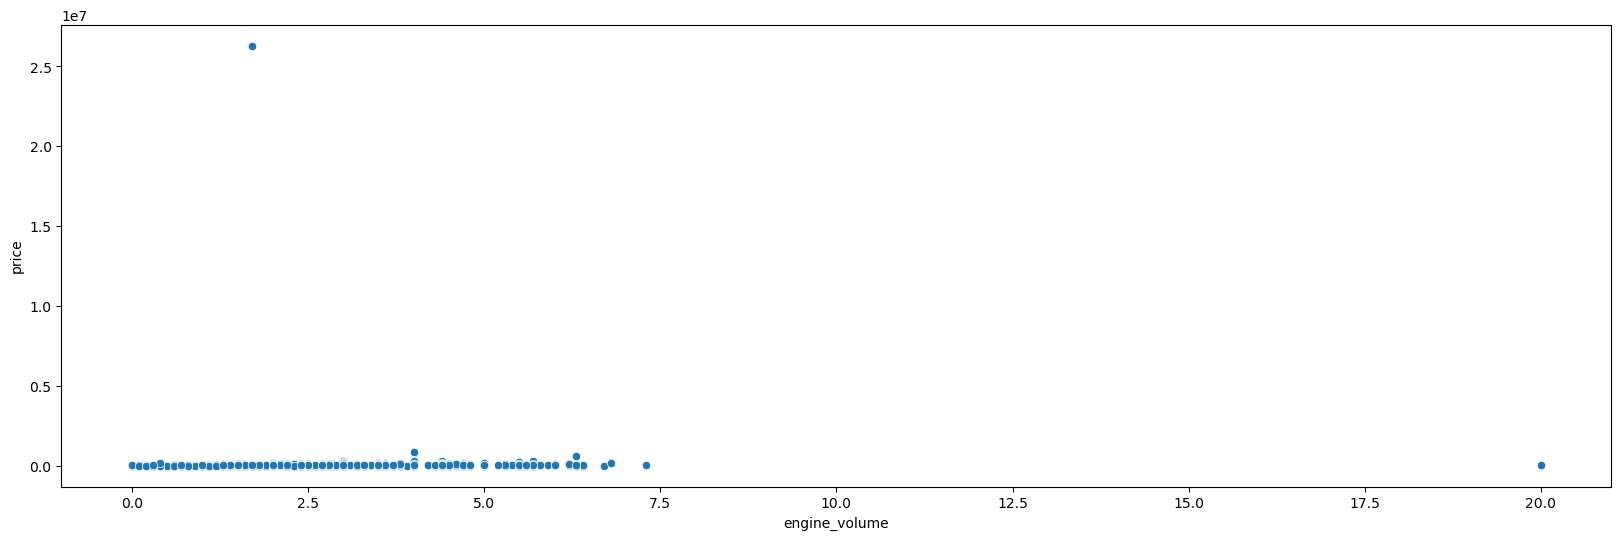

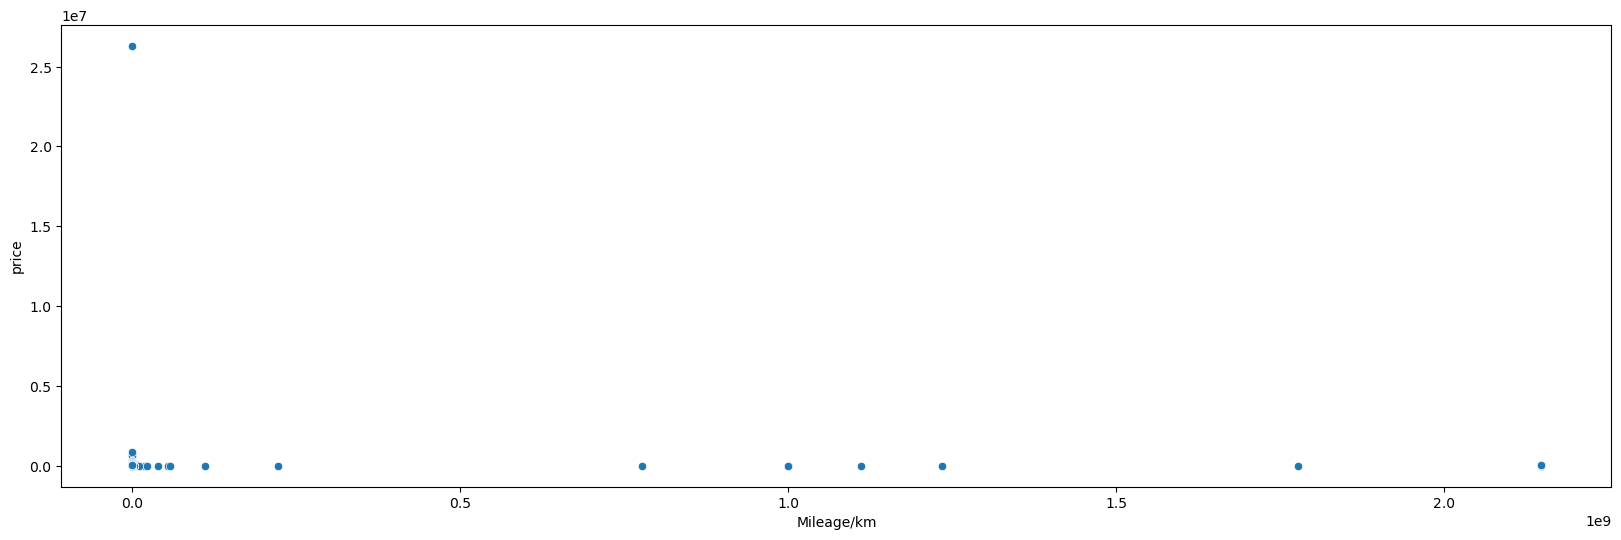

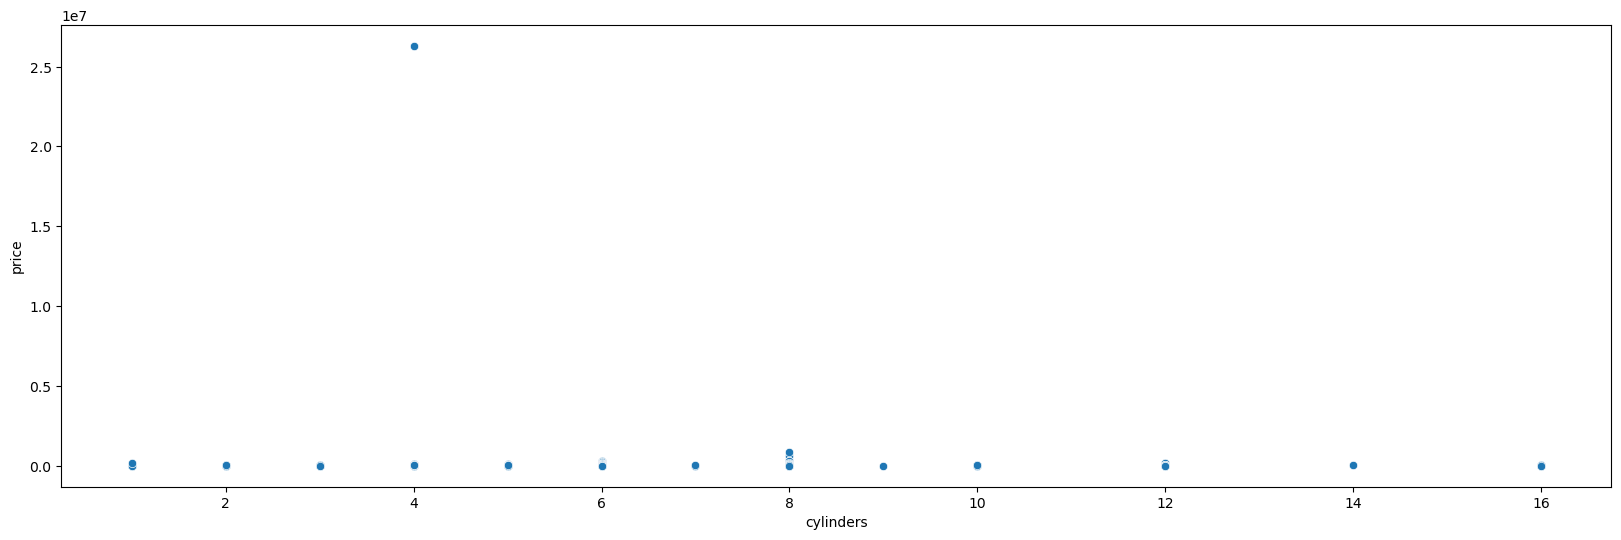

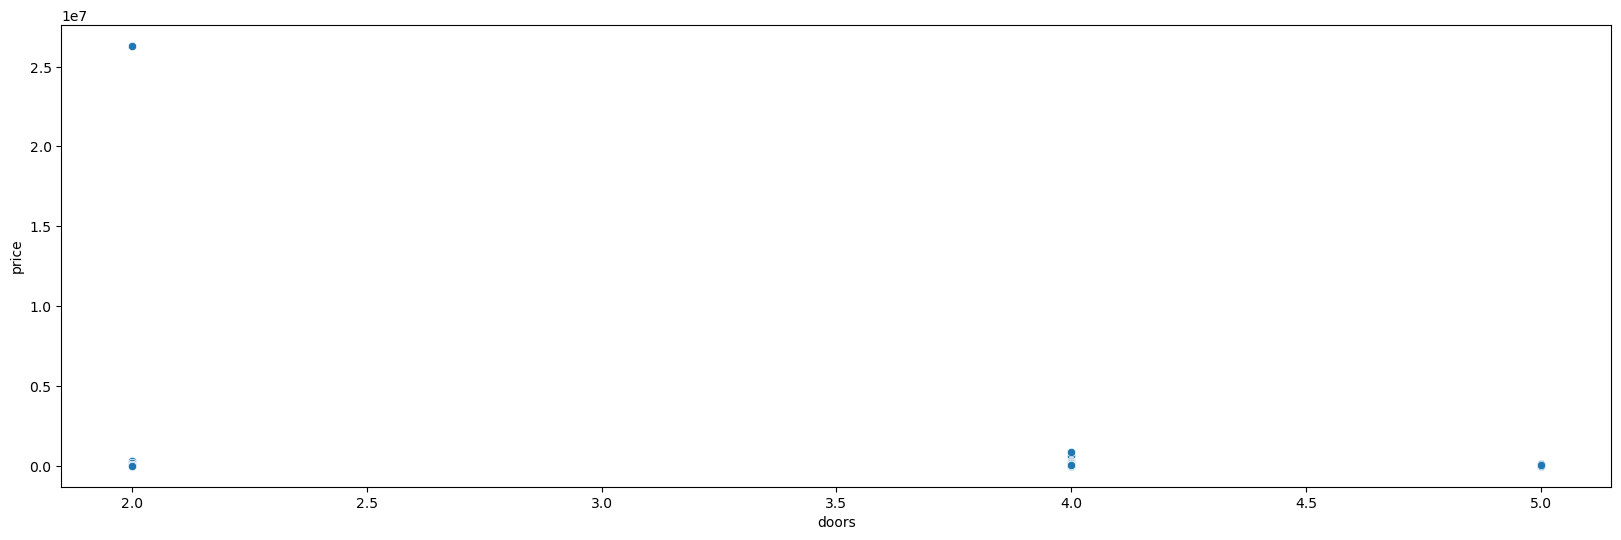

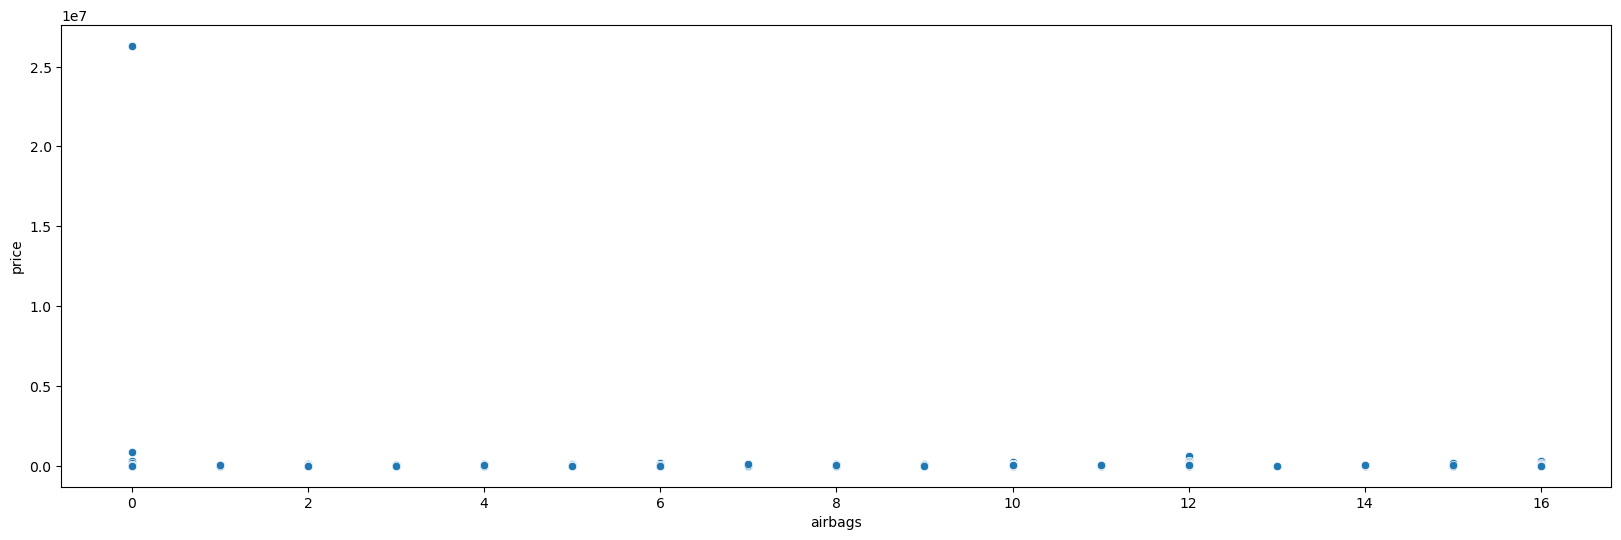

In [27]:
# Plot the numerical variables 
for col in numerical_col:
    plt.figure(figsize=(20,6))
    sns.scatterplot(x=data[col], y=data['price'])


In [28]:
data['category'].value_counts()


Sedan          6596
Jeep           3992
Hatchback      2332
Minivan         512
Coupe           459
Universal       311
Microbus        285
Goods wagon     226
Pickup           47
Cabriolet        33
Limousine         6
Name: category, dtype: int64

Text(0.5, 1.0, ' by each Category')

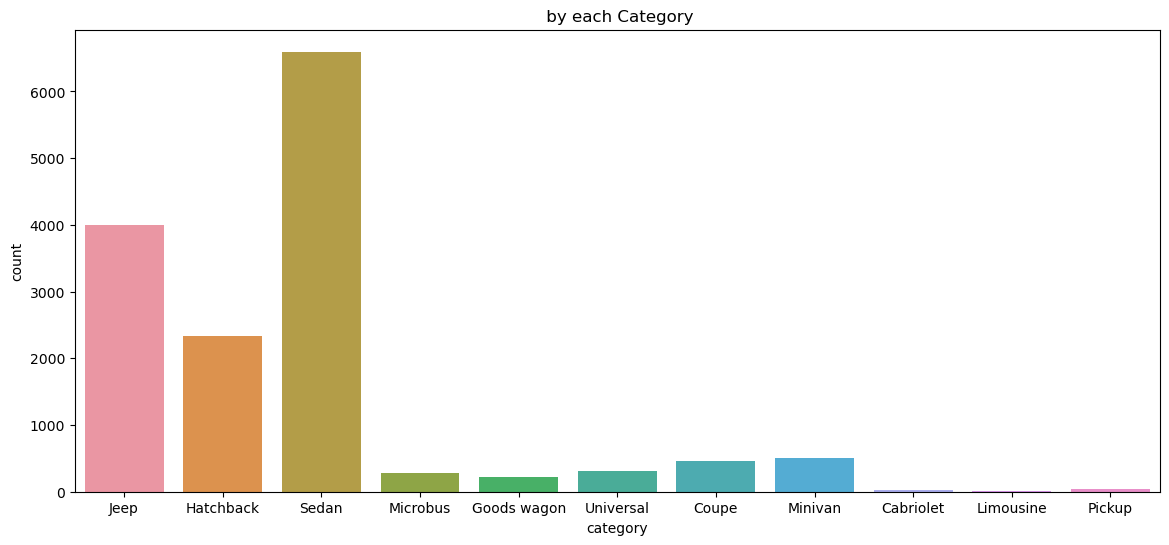

In [29]:
plt.subplots(figsize=(14,6))
sns.countplot(data= data, x='category')
plt.title(" by each Category")

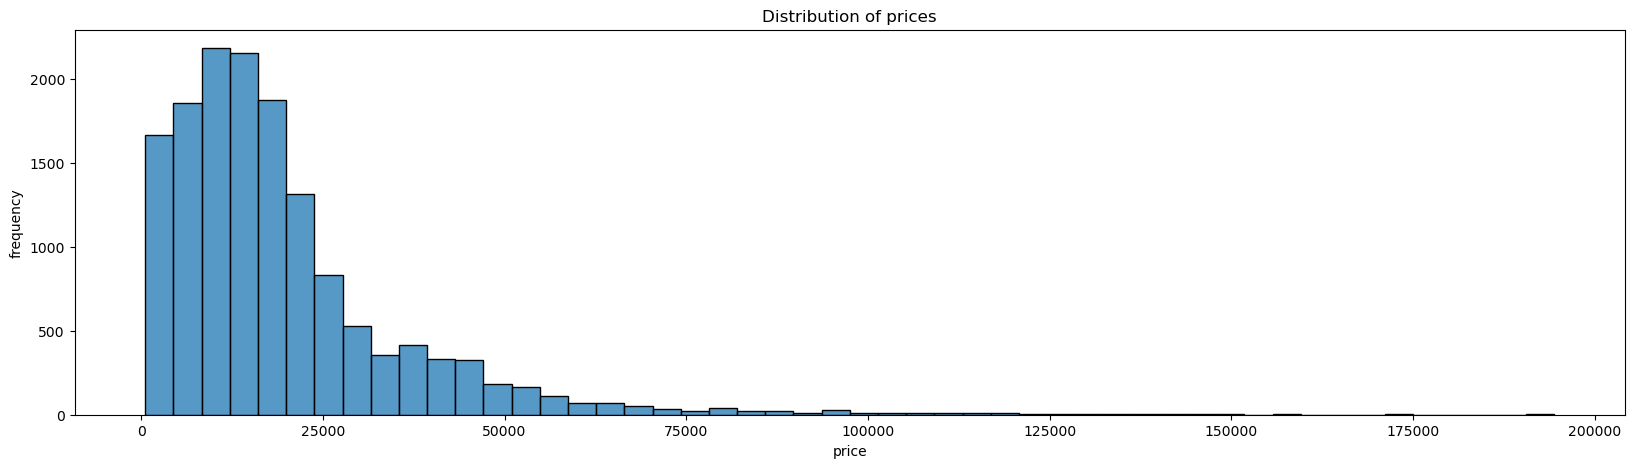

In [30]:
plt.figure(figsize=(20,5))
sns.histplot(data.price[data.price<200000],bins=50)
plt.ylabel("frequency")
plt.xlabel("price")
plt.title("Distribution of prices")
plt.show()


In [31]:
x=data.drop("price", axis=1)
x


,levy,manufacturer,model,prod._year,category,leather_interior,fuel_type,engine_volume,Mileage/km,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,Turbo_engine
0,"1,399.00",LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.50,186005,6,Automatic,4x4,4,Left wheel,Silver,12,False
1,"1,018.00",CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.00,192000,6,Tiptronic,4x4,4,Left wheel,Black,8,False
2,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.30,200000,4,Variator,Front,4,Right-hand drive,Black,2,False
3,862.00,FORD,Escape,2011,Jeep,Yes,Hybrid,2.50,168966,4,Automatic,4x4,4,Left wheel,White,0,False
4,446.00,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.30,91901,4,Automatic,Front,4,Left wheel,Silver,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,"1,107.00",OPEL,Combo,2007,Goods wagon,No,Diesel,1.70,236000,4,Manual,Front,4,Left wheel,Beige,4,True
19226,NaN,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.00,220000,6,Tiptronic,Rear,4,Right-hand drive,White,0,False
19232,NaN,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.00,300000,4,Manual,Rear,2,Left wheel,Silver,5,True
19233,831.00,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.40,161600,4,Tiptronic,Front,4,Left wheel,Red,8,False


In [32]:
y=data.iloc[:,[0]]
y


,price
0,13328
1,16621
2,8467
3,3607
4,11726
...,...
19225,8781
19226,7840
19232,8467
19233,15681


In [33]:
x_train_full,x_test_full,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [34]:
categorical_cols = [cname for cname in x_train_full.columns if x_train_full[cname].nunique() < 10 
                    and x_train_full[cname].dtype in ['object','boolean']]

# Numerical_col
numerical_cols = [cname for cname in x_train_full.columns if x_train_full[cname].dtype in ['int64', 'float64']]
my_cols = categorical_cols + numerical_cols

x_train = x_train_full[my_cols].copy()
x_test = x_test_full[my_cols].copy()


In [35]:
x_train_full.shape


(11839, 17)

In [36]:
y_train.shape

(11839, 1)

In [37]:
x_test_full.shape


(2960, 17)

In [38]:
y_test.shape


(2960, 1)

In [39]:
x_train_full.corr()


C:\Users\SAI CHARAN\AppData\Local\Temp\ipykernel_10280\1021132437.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train_full.corr()


,levy,prod._year,engine_volume,Mileage/km,cylinders,doors,airbags,Turbo_engine
levy,1.00,-0.22,0.57,0.03,0.49,-0.08,0.07,-0.02
prod._year,-0.22,1.00,-0.07,-0.05,-0.13,0.20,0.28,-0.06
engine_volume,0.57,-0.07,1.00,-0.00,0.73,-0.03,0.25,0.02
Mileage/km,0.03,-0.05,-0.00,1.00,0.00,-0.01,-0.02,0.00
cylinders,0.49,-0.13,0.73,0.00,1.00,-0.05,0.24,0.08
doors,-0.08,0.20,-0.03,-0.01,-0.05,1.00,0.06,-0.08
airbags,0.07,0.28,0.25,-0.02,0.24,0.06,1.00,0.09
Turbo_engine,-0.02,-0.06,0.02,0.00,0.08,-0.08,0.09,1.00


C:\Users\SAI CHARAN\AppData\Local\Temp\ipykernel_10280\3230327499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train_full.corr(),annot=True)


<Axes: >

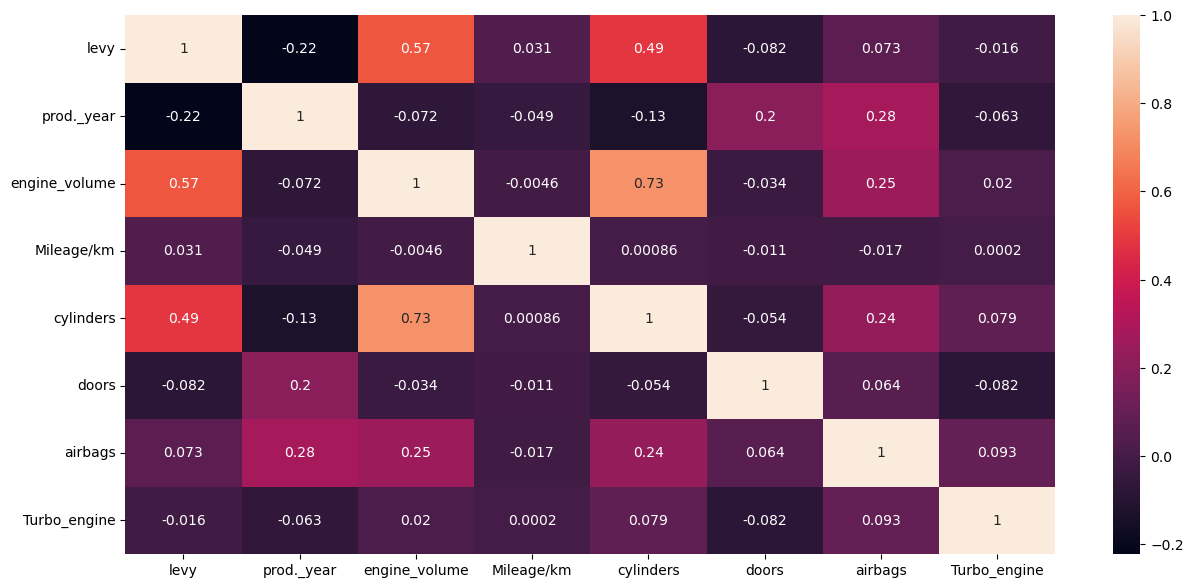

In [40]:
plt.figure(figsize=(15,7))
sns.heatmap(x_train_full.corr(),annot=True)


In [41]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [42]:
model=RandomForestRegressor(n_estimators=100, random_state=0) 


In [43]:
# create the  pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', model)])

# Preprocessing of training data, fit model 
my_pipeline.fit(x_train, y_train.values.ravel())

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(x_test)

# Evaluate the model
score = mean_absolute_error(y_test, preds)
print('The mean absolute error is:', score) 

# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(x_test_full)


The mean absolute error is: 15822.130479329006
